In [86]:
''' in this code we will see that the vanishing gradient problem and how it effects the model and accuracy'''

' in this code we will see that the vanishing gradient problem and how it effects the model and accuracy'

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [73]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [74]:
X,y=make_moons(n_samples=500,noise=0.1,random_state=42)

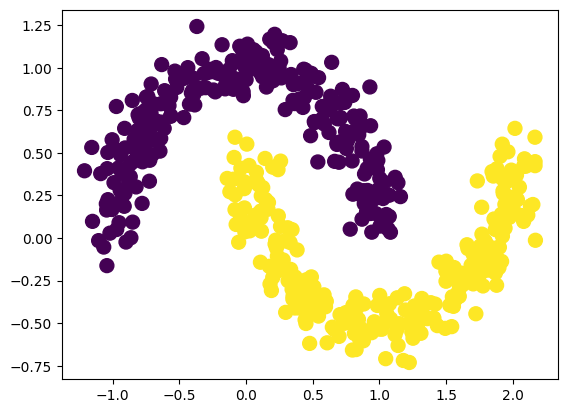

In [75]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.show()

In [76]:
model=Sequential()
model.add(Dense(10,activation="sigmoid",input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [78]:
old_weights=model.get_weights()[0]

In [79]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [80]:
model.fit(x_train,y_train,epochs=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4824 - loss: 0.6965


In [81]:
new_weights=model.get_weights()[0]

In [82]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [87]:
'''here i have calculated the gradient to see in the time of backpropogation how the gradient change at what percent the gradient change'''

'here i have calculated the gradient to see in the time of backpropogation how the gradient change at what percent the gradient change'

In [83]:
gradient=(old_weights-new_weights)/0.001
percentage_change=abs(100*(old_weights-new_weights)/old_weights)

In [88]:
'''here you can see that when the gradient is so small and the percentage changes is very small now when the Neural network is deep the new weights and old weights do not update due to this vanishing gradient problem'''

'here you can see that when the gradient is so small and the percentage changes is very small now when the Neural network is deep the new weights and old weights do not update due to this vanishing gradient problem'

In [84]:
gradient

array([[-0.21952389,  0.20354985, -0.28330088, -0.08779763, -0.2068281 ,
         0.0321269 , -0.4137754 , -0.08338689,  0.03630668, -0.3274679 ],
       [ 0.20831822, -0.18447636,  0.25495887,  0.11295079,  0.24443863,
        -0.03375113,  0.4456341 ,  0.10521709, -0.0398159 ,  0.3557652 ]],
      dtype=float32)

In [85]:
percentage_change

array([[0.07676696, 0.08064884, 0.15473633, 0.01360785, 0.02935097,
        0.00455107, 0.06871596, 0.01314653, 0.02942394, 0.05442839],
       [0.08752388, 0.04379714, 0.0511042 , 0.02159098, 0.21231994,
        0.01378622, 0.22794388, 0.04962365, 0.0057571 , 0.15123938]],
      dtype=float32)

In [85]:
'''handle vanishing gradient problem
1)Reduce model Complexity
2)using relu activation Function
3)proper weight intialization
4)batch normalization
5)residual network